In [74]:
# Tuple Base
# Note: w=1.0 is a point , w=0.0 is a vector
class Tuple:
    def __init__(self, x, y, z, w):
        self.x = x
        self.y = y
        self.z = z
        self.w = w

    def len(self):
        return 4

    def __eq__(self, value):
        return (
            (self[0] == value[0])
            and (self[1] == value[1])
            and (self[2] == value[2])
            and (self[3] == value[3])
        )

    def __getitem__(self, index):
        return (self.x, self.y, self.z, self.w)[index]

    def __add__(self, other):
        return Tuple(
            self.x + other.x, self.y + other.y, self.z + other.z, self.w + other.w
        )

    def __sub__(self, other):
        return Tuple(
            self.x - other.x, self.y - other.y, self.z - other.z, self.w - other.w
        )

    def __mul__(self, other):
        if isinstance(other, float):
            return Tuple(self.x * other, self.y * other, self.z * other, self.w * other)
        if isinstance(other, int):
            return Tuple(self.x * other, self.y * other, self.z * other, self.w * other)
        return NotImplemented

    def __truediv__(self, other):
        if isinstance(other, float):
            return Tuple(self.x / other, self.y / other, self.z / other, self.w / other)
        if isinstance(other, int):
            return Tuple(self.x / other, self.y / other, self.z / other, self.w / other)
        return NotImplemented

    def __repr__(self):
        return f"Tuple({self.x} {self.y} {self.z} {self.w})"

    def is_point(self):
        return self.w == 1.0

    def is_vector(self):
        return self.w == 0.0

    def neg(self):
        return Tuple(-self.x, -self.y, -self.z, -self.w)

    def magnitude(self):
        return (self.x**2 + self.y**2 + self.z**2 + self.w**2) ** 0.5

    def normalize(self):
        mag = self.magnitude()
        return Tuple(self.x / mag, self.y / mag, self.z / mag, self.w / mag)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z + self.w * other.w

    def cross(self, other):
        return Vector(
            self.y * other.z - self.z * other.y,
            self.z * other.x - self.x * other.z,
            self.x * other.y - self.y * other.x,
        )


# --- Tests ---


# Test with w=1.0 (a point)
def test_tuple_create_point():
    a = Tuple(4.3, -4.2, 3.1, 1.0)
    assert a[0] == 4.3
    assert a[1] == -4.2
    assert a[2] == 3.1
    assert a[3] == 1.0
    assert a.is_point()
    assert not a.is_vector()


test_tuple_create_point()

# Test with w=0.0 (a vector)


def test_tuple_create_vector():
    a = Tuple(4.3, -4.2, 3.1, 0.0)
    assert a[0] == 4.3
    assert a[1] == -4.2
    assert a[2] == 3.1
    assert a[3] == 0.0
    assert not a.is_point()
    assert a.is_vector()


test_tuple_create_vector()

In [24]:
# Point and Vector constructors
def Point(x, y, z):
    return Tuple(x, y, z, 1.0)


def Vector(x, y, z):
    return Tuple(x, y, z, 0.0)


# --- Tests ---
def test_point_constructor():
    p = Point(4, -4, 3)
    assert p == (4, -4, 3, 1.0)
    assert p.is_point()
    assert not p.is_vector()


test_point_constructor()


def test_vector_constructor():
    v = Vector(4, -4, 3)
    assert v == (4, -4, 3, 0.0)
    assert not v.is_point()
    assert v.is_vector()


test_vector_constructor()

In [ ]:
# Test add / sub vectors
def test_tuple_add():
    a = Tuple(3, -2, 5, 1)
    b = Tuple(-2, 3, 1, 0)
    c = a + b
    assert c == (1, 1, 6, 1)


test_tuple_add()


def test_tuple_sub():
    p1 = Point(3, 2, 1)
    p2 = Point(5, 6, 7)
    ps = p1 - p2
    assert ps == (-2, -4, -6, 0.0)


test_tuple_sub()

In [ ]:
def test_tuple_neg():
    a = Tuple(1, -2, 3, -4)
    assert a.neg() == (-1, 2, -3, 4)


test_tuple_neg()

In [52]:
def test_tuple_scalar_mul():
    a = Tuple(1, -2, 3, -4)
    a_m = a * 0.5
    a_execpected = Tuple(0.5, -1.0, 1.5, -2.0)
    assert a_m == a_execpected


test_tuple_scalar_mul()


def test_tuple_scalar_div():
    a = Tuple(1, -2, 3, -4)
    a_m = a / 2
    a_execpected = Tuple(0.5, -1.0, 1.5, -2.0)
    assert a_m == a_execpected


test_tuple_scalar_div()

In [57]:
def test_tuple_magnitude():
    v = Vector(1, 2, 3)
    assert v.magnitude() == (14) ** 0.5
    v = Vector(-1, -2, -3)
    assert v.magnitude() == (14) ** 0.5
    v = Vector(0, 0, 0)
    assert v.magnitude() == 0.0
    v = Vector(1, 0, 0)
    assert v.magnitude() == 1.0
    v = Vector(0, 1, 0)
    assert v.magnitude() == 1.0
    v = Vector(0, 0, 1)
    assert v.magnitude() == 1.0
    v = Vector(1, 2, 3)
    assert v.magnitude() == (14) ** 0.5


test_tuple_magnitude()

In [61]:
def test_tuple_normalize():
    v = Vector(4, 0, 0)
    assert v.normalize() == Vector(1, 0, 0)
    v = Vector(1, 2, 3)
    norm = v.normalize()
    assert norm == Vector(1 / (14**0.5), 2 / (14**0.5), 3 / (14**0.5))
    assert abs(norm.magnitude() - 1.0) < 0.00001


test_tuple_normalize()

In [67]:
def test_tuple_dot():
    a = Vector(1, 2, 3)
    b = Vector(2, 3, 4)
    assert a.dot(b) == 20


test_tuple_dot()

In [75]:
def test_tuple_cross():
    a = Vector(1, 2, 3)
    b = Vector(2, 3, 4)
    c_ab = a.cross(b)
    c_ba = b.cross(a)

    assert c_ab == Vector(-1, 2.0, -1)
    assert c_ba == Vector(1, -2, 1)


test_tuple_cross()

In [80]:
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


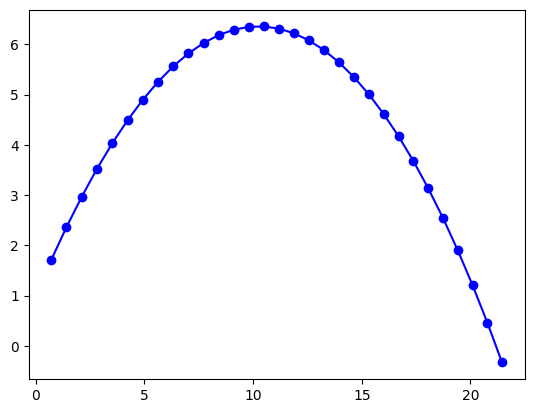

In [90]:
import matplotlib.pyplot as plt


class Projectile:
    def __init__(self, pos, vel):
        self.position = pos
        self.velocity = vel


class Enviornment:
    def __init__(self, gravity, wind):
        self.gravity = gravity
        self.wind = wind


class ProjectileSim:
    def __init__(self):
        self.projectile = Projectile(Point(0, 1, 0), Vector(1, 1, 0).normalize())
        self.enviornment = Enviornment(Vector(0, -0.05, 0), Vector(-0.001, 0, 0))

    def tick(self):
        self.projectile.position = self.projectile.position + self.projectile.velocity
        self.projectile.velocity = (
            self.projectile.velocity + self.enviornment.gravity + self.enviornment.wind
        )
        return self.projectile.position


# -----

fig, ax = plt.subplots()
x_data = []
y_data = []

sim = ProjectileSim()

while sim.projectile.position.y > 0:
    pos = sim.tick()
    x_data.append(pos.x)
    y_data.append(pos.y)
    # Clear the previous plot


# Plot the data
ax.plot(x_data, y_data, "bo-")  # 'bo-' means blue color, circle markers, solid line